In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Functions

In [17]:
def plot_channels(X, y, start=0, end=1, col_start=0, col_end=15, figsize=(20,10), plot_label=True):
    data_len = len(X)
    start_index, end_index = int(data_len*start), int(data_len*end)
    X, y = X.iloc[start_index:end_index], y.iloc[start_index:end_index]
    fig, ax = plt.subplots(figsize=figsize)
    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    y = MinMaxScaler().fit_transform(y.values.reshape(-1,1))
    for col in X.columns[col_start:col_end]:
        ax.plot(X[col], label=col)
    if plot_label:
        ax.plot(y, label='label')
    plt.legend()
    
def compute_fft(sig, fs):
    period_s = 1/fs
    freq_components = np.fft.rfft(sig)
    fft_freqs = np.fft.rfftfreq(len(sig), period_s)   
    return fft_freqs, freq_components
    

In [18]:
data = pd.read_csv('../data/two_motions_opto_preprocessed.csv', sep='\t').drop(columns=['Unnamed: 0'])
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,time_s,trigger
0,37292.0,25887.0,25235.0,42693.0,16259.0,25221.0,31435.0,20880.0,11206.0,37417.0,...,18080.0,33607.0,18842.0,19414.0,36984.0,21346.0,26338.0,36961.0,0.014875,0.0
1,36506.0,25552.0,23993.0,43510.0,16740.0,24965.0,31605.0,21084.0,13836.0,35495.0,...,18185.0,32452.0,17903.0,19262.0,36560.0,21019.0,26233.0,36951.0,0.045000,0.0


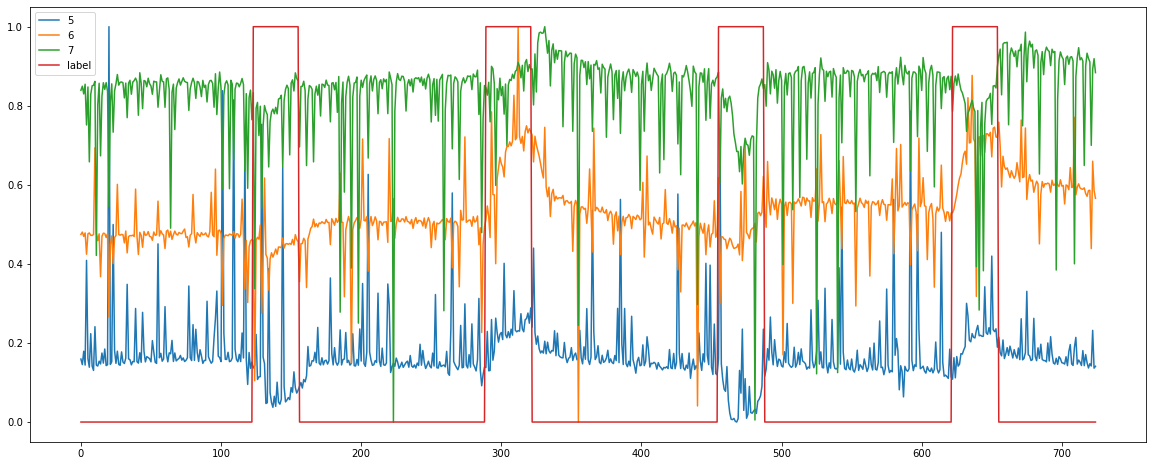

In [28]:
X = data.drop(columns=['time_s', 'trigger'])
y = data['trigger']
y = y.shift(5).fillna(0)
X = pd.DataFrame(MinMaxScaler().fit_transform(X))
plot_channels(X, y, start=0.0, end=0.06 ,col_start=5, col_end=8, figsize=(20,8), plot_label=True)